# IBM Capstone Project
### Coding

## 1 Introduction

The business problem
The business problem I want to solve is to open a new bubble tea shop in Tokyo. Usually we would like to ask questions like: why? How? Where? This report will focus on why and where.  Utilizing the data science techniques including data analysis, data visualization and machine learning, I would like to deliver the solutions for the following questions:
* Why should invest in bubble tea shop?
* Current bubble tea shop market analysis
* Where is the optimal location for the shop?

Target Audience
* Individuals interested in investment of bubble tea shop
* Bubble tea lovers
* Data scientist interested in data analysis and visualization


## 2.1 Prepare the data

For the first step, I get the data from the wikipedia about the 23 wards of Tokyo area and their districts. I used pyhon package "beautiful soup" to scrap these dataset into a pandas dataframe format. 

In [1]:
# get Tokyo 23 Wards data from wikipedia

import requests
website_url = requests.get("https://en.wikipedia.org/wiki/Special_wards_of_Tokyo").text

In [177]:
#format the data better
#from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url,'lxml') 
Tokyo_table = soup.find('table',{'class':'wikitable sortable'})
import pandas as pd
table_rows = Tokyo_table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
#data formatting
df = pd.DataFrame(data)
df.drop([0],axis=0,inplace = True)
df.drop([24],axis=0,inplace = True)
df.drop([1,3,4,5,6],axis = 1, inplace = True)
df.columns = ['number','Ward','District']
df.head()

,number,Ward,District
1,01,Chiyoda,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
2,02,Chūō,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
3,03,Minato,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
4,04,Shinjuku,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
5,05,Bunkyō,"Hongō, Yayoi, Hakusan"


In [22]:
df.columns = ['number','Ward','District']
df

,number,Ward,District
1,01,Chiyoda,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
2,02,Chūō,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
3,03,Minato,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
4,04,Shinjuku,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
5,05,Bunkyō,"Hongō, Yayoi, Hakusan"
6,06,Taitō,"Ueno, Asakusa"
7,07,Sumida,"Kinshichō, Morishita, Ryōgoku"
8,08,Kōtō,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
9,09,Shinagawa,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
10,10,Meguro,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [180]:
#format the table to contain all districts as rows
df1 = pd.concat([df[['number','Ward']], df['District'].str.split(', ', expand=True)], axis=1)

data2 = []
data3 = []
for i in range(len(df1)):
    for j in range(11):
        data2.append([df1.iloc[i,j+2]])
        data3.append([df1.iloc[i,1]])
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df_Tokyo = pd.concat([df3,df2],axis=1)
df_Tokyo.columns = ['Ward','District']
df_Tokyo = df_Tokyo[~df_Tokyo['District'].isnull()] 

In [181]:
df_Tokyo
df_Tokyo.set_index('Ward',inplace = True)


In [182]:
df_Tokyo

,District
Ward,
Chiyoda,Nagatachō
Chiyoda,Kasumigaseki
Chiyoda,Ōtemachi
Chiyoda,Marunouchi
Chiyoda,Akihabara
Chiyoda,Yūrakuchō
Chiyoda,Iidabashi
Chiyoda,Kanda
Chūō,Nihonbashi


## 2.2 Get the latitude and longitude information
Then we would like to use geopy package to get the corresponding latitude and longitude information for each district. 

In [183]:
len(df_Tokyo)

106

In [184]:
#use Nominatim to get the latitude and longitude information
from geopy.geocoders import Nominatim
data4 = []
data5 = []

geolocator = Nominatim(user_agent="Tokyo_explorer")
for k in range(len(df_Tokyo)):
    location = geolocator.geocode(df_Tokyo.iloc[k,0])
    latitude = location.latitude
    longitude = location.longitude
    data4.append(latitude)
    data5.append(longitude)


In [185]:
df_Tokyo['latitude'] = data4
df_Tokyo['longtitude'] = data5

In [186]:
#save the information into pandas dataframe 
df_Tokyo.reset_index(inplace = True)
df_Tokyo

,Ward,District,latitude,longtitude
0,Chiyoda,Nagatachō,35.675618,139.743469
1,Chiyoda,Kasumigaseki,35.672478,139.752388
2,Chiyoda,Ōtemachi,35.686794,139.766200
3,Chiyoda,Marunouchi,35.204882,136.841895
4,Chiyoda,Akihabara,35.699736,139.771250
5,Chiyoda,Yūrakuchō,35.674423,139.761674
6,Chiyoda,Iidabashi,35.701869,139.745381
7,Chiyoda,Kanda,29.855563,81.298341
8,Chūō,Nihonbashi,35.684058,139.774501
9,Chūō,Kayabachō,35.680229,139.779424


## 2.3 Generate the map

Utilizing the folium map package in Python, we can give a more user-friendly picture to show you the range of these districts we will research for this project. 

In [187]:
# define the center of the map
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 35.6828387, 139.7594549.


In [188]:
# add labels for each district into the map 

!pip -q install folium
import folium 
map_Tokyo = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Tokyo['latitude'], df_Tokyo['longtitude'], df_Tokyo['Ward'],df_Tokyo['District']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Tokyo)  
    
map_Tokyo

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


## 2.4 Foursquare location data

200 popular venues within one kilometer of each neighborhood.

In [102]:
#Foursquare app information
#has been modified due to personal confidential information
CLIENT_ID = 'RTJ1RYNNZFTZ13JDAC2VPZQRTBWS3RQQRWAIM220' 
CLIENT_SECRET = 'VED3XCUICY1MJKD0WTNMQTSRSXLP5JTGRDFBOJVN5' 
VERSION = '20190701' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RTJ1RYNNZFTZ13JDAC2VPZQRTBWS3RQQRWAIM220MT1SHSHL
CLIENT_SECRET:VED3XCUICY1MJKD0WTNMQTSRSXLP5JTGRDFBOJVN5KUKCJ5I


In [214]:
#function to get the venues as required
LIMIT = 200
radius =1000
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [215]:
Tokyo_venues = getNearbyVenues(names=df_Tokyo['District'],
                                   latitudes=df_Tokyo['latitude'],
                                   longitudes=df_Tokyo['longtitude']
                                  )

Nagatachō
Kasumigaseki
Ōtemachi
Marunouchi
Akihabara
Yūrakuchō
Iidabashi
Kanda
Nihonbashi
Kayabachō
Ginza
Tsukiji
Hatchōbori
Shinkawa
Tsukishima
Kachidoki
Tsukuda
Odaiba
Shinbashi
Hamamatsuchō
Mita
Roppongi
Toranomon
Aoyama
Azabu
Shinjuku
Takadanobaba
Ōkubo
Kagurazaka
Ichigaya
Yotsuya
Hongō
Yayoi
Hakusan
Ueno
Asakusa
Kinshichō
Morishita
Ryōgoku
Kiba
Ariake
Kameido
Tōyōchō
Monzennakachō
Fukagawa
Kiyosumi
Shirakawa
Etchūjima
Sunamachi
Aomi
Shinagawa
Gotanda
Ōsaki
Hatanodai
Ōimachi
Tennōzu
Meguro
Nakameguro
Jiyugaoka
Komaba
Aobadai
Ōmori
Kamata
Haneda
Den-en-chōfu
Setagaya
Shimokitazawa
Kinuta
Karasuyama
Tamagawa
Shibuya
Ebisu
Harajuku
Daikanyama
Hiroo
Sendagaya
Yoyogi
Nakano
Kōenji
Asagaya
Ogikubo
Ikebukuro
Komagome
Senkawa
Sugamo
Akabane
Ōji
Tabata
Arakawa
Machiya
Nippori
Minamisenju
Itabashi
Takashimadaira
Nerima
Ōizumi
Hikarigaoka
Ayase
Kitasenju
Takenotsuka
Tateishi
Aoto
Kameari
Shibamata
Kasai
Koiwa


## 3.1 market analysis

Check the frequency of venues and beverage related venues in Tokyo

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


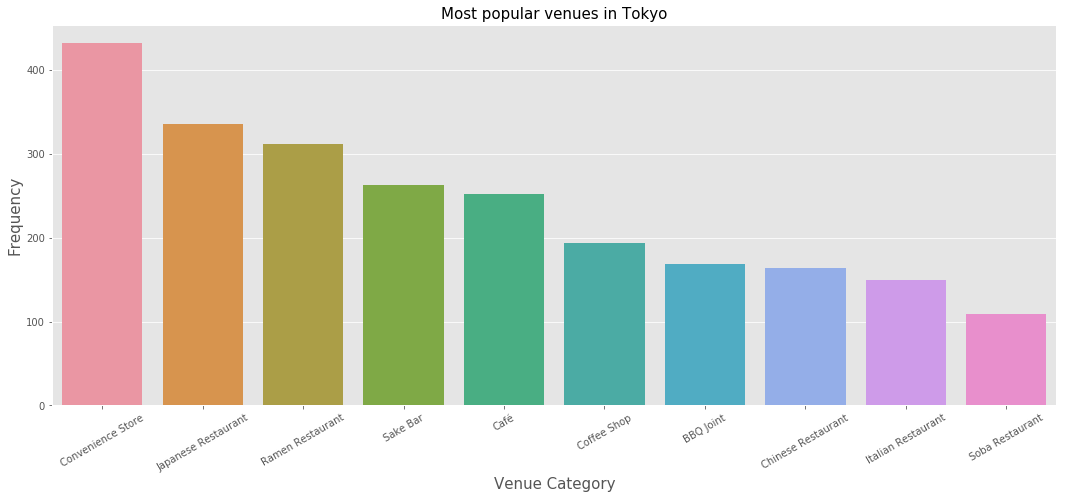

In [216]:
# get the count table sorted in descending order for most popular venues
High_Frequency = Tokyo_venues.groupby('Venue Category').count()
High_Frequency = High_Frequency.sort_values(by = ['Neighborhood'],ascending = False)
High_Frequency = High_Frequency.head(10)
High_Frequency.reset_index(inplace= True)
#visualize the data 
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Neighborhood", data=High_Frequency)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Most popular venues in Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

In [235]:
#bubble tea shop contained in this table
bubble_tea = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains("Bubble")]
bubble_tea

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
285,Akihabara,35.699736,139.771250,THE ALLEY,35.701925,139.772092,Bubble Tea Shop
2881,Aomi,35.624779,139.781202,Chun Shui Tang (春水堂),35.624824,139.779746,Bubble Tea Shop
4220,Harajuku,35.668705,139.705336,Chun Shui Tang (春水堂),35.668705,139.706977,Bubble Tea Shop
4228,Harajuku,35.668705,139.705336,Gong cha (Gong cha 貢茶),35.667431,139.705710,Bubble Tea Shop
4307,Daikanyama,35.648157,139.703293,Chun Shui Tang (春水堂),35.648445,139.702999,Bubble Tea Shop
4674,Asagaya,35.704840,139.635472,Gong cha (Gong cha 貢茶),35.704722,139.636499,Bubble Tea Shop


Expansion of our analysis to tea, coffee and dessert

In [226]:
#contain more venues in beverage field..
Target = ['Café', 'Coffee','Tea','Dessert']
Tokyo_coffee = pd.DataFrame()
for each in Target:
    info = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains(each)]
    Tokyo_coffee=pd.concat([Tokyo_coffee,info])

In [227]:
Tokyo_coffee

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,Nagatachō,35.675618,139.743469,フェリカ,35.679126,139.744411,Café
35,Kasumigaseki,35.672478,139.752388,PRONTO Library Shop & Cafe (PRONTO ライブラリーショップ&...,35.671814,139.754179,Café
43,Kasumigaseki,35.672478,139.752388,illy bar,35.670485,139.751497,Café
132,Ōtemachi,35.686794,139.766200,The Cafe by AMAN,35.685593,139.765447,Café
146,Ōtemachi,35.686794,139.766200,玄米カフェ 実身美 大手町店,35.685149,139.763645,Café
151,Ōtemachi,35.686794,139.766200,cafe1869 by MARUZEN,35.683544,139.766752,Café
160,Ōtemachi,35.686794,139.766200,Machimura Farm (町村農場),35.683013,139.764090,Café
161,Ōtemachi,35.686794,139.766200,DEAN & DELUCA,35.683545,139.764230,Café
183,Ōtemachi,35.686794,139.766200,Tante Marie,35.683305,139.766688,Café
219,Ōtemachi,35.686794,139.766200,Tokyo Oven (東京オーブン),35.690453,139.767756,Café


In [153]:
import matplotlib as mlt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [228]:
High_Freq = Tokyo_coffee.groupby('Venue Category').count()
High_Freq = High_Freq.sort_values(by = ['Neighborhood'],ascending = False)
High_Freq.reset_index(inplace = True)
High_Freq

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Café,252,252,252,252,252,252
1,Coffee Shop,193,193,193,193,193,193
2,Dessert Shop,49,49,49,49,49,49
3,Tea Room,26,26,26,26,26,26
4,Pet Café,7,7,7,7,7,7
5,Bubble Tea Shop,6,6,6,6,6,6


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


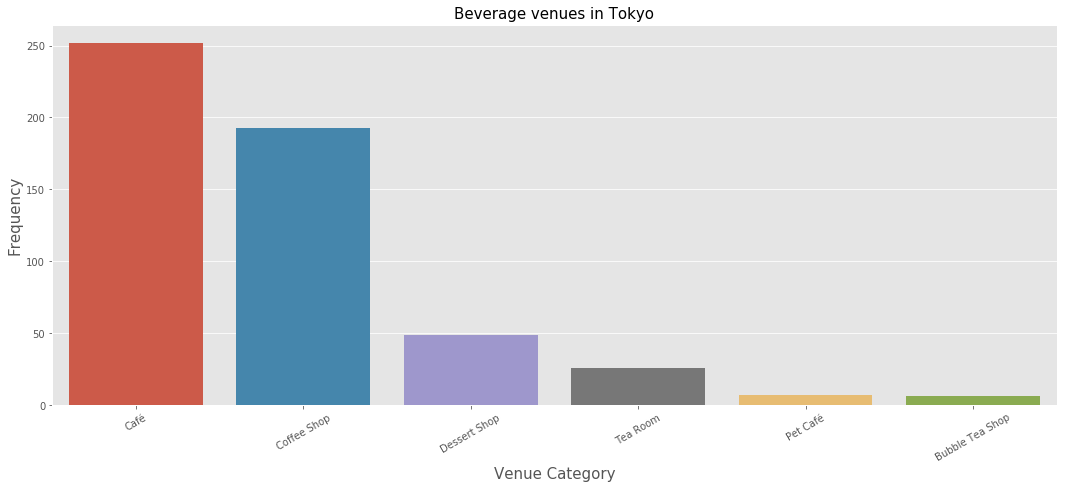

In [229]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s = sns.barplot(x="Venue Category", y="Neighborhood", data=High_Freq)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Beverage venues in Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()



## 5 Location of the shop

In [232]:
#find the popular district 
High_Freq2 = Tokyo_coffee.groupby('Neighborhood').count()
High_Freq2 = High_Freq2.sort_values(by = ['Venue Category'],ascending = False)
High_Freq2.reset_index(inplace = True)
High_Freq2 = High_Freq2.head(10)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


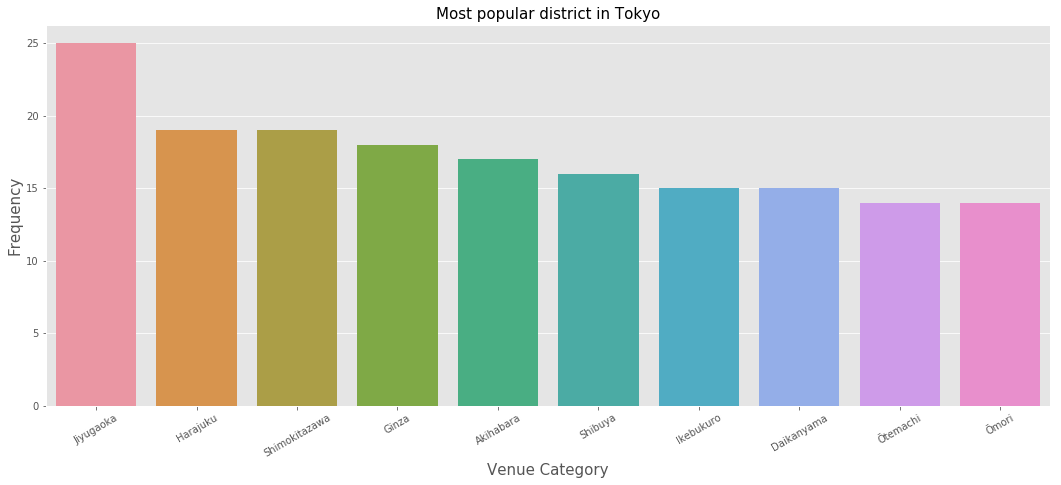

In [233]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s = sns.barplot(x="Neighborhood", y="Venue Category", data=High_Freq2)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Most popular district in Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()


In [239]:
map_bubbletea = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(bubble_tea['Neighborhood Latitude'], bubble_tea['Neighborhood Longitude'], bubble_tea['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#FF4500',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bubbletea)  
    
map_bubbletea

In [259]:
map_coffee = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(Tokyo_coffee['Neighborhood Latitude'], Tokyo_coffee['Neighborhood Longitude'], Tokyo_coffee['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FA8072',
        fill_opacity=0.7,
        parse_html=False).add_to(map_coffee)  
    
map_coffee

## 4 Clustering

In [260]:
# one hot encoding
Tokyo_onehot = pd.get_dummies(Tokyo_coffee[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_coffee['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + list(Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.head()

,Neighborhood,Bubble Tea Shop,Café,Coffee Shop,Dessert Shop,Pet Café,Tea Room
30,Nagatachō,0,1,0,0,0,0
35,Kasumigaseki,0,1,0,0,0,0
43,Kasumigaseki,0,1,0,0,0,0
132,Ōtemachi,0,1,0,0,0,0
146,Ōtemachi,0,1,0,0,0,0


In [261]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,Bubble Tea Shop,Café,Coffee Shop,Dessert Shop,Pet Café,Tea Room
0,Akabane,0.000000,0.222222,0.444444,0.111111,0.000000,0.222222
1,Akihabara,0.058824,0.705882,0.058824,0.058824,0.117647,0.000000
2,Aobadai,0.000000,0.400000,0.600000,0.000000,0.000000,0.000000
3,Aomi,0.166667,0.333333,0.500000,0.000000,0.000000,0.000000
4,Aoto,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
5,Arakawa,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
6,Ariake,0.000000,0.428571,0.571429,0.000000,0.000000,0.000000
7,Asagaya,0.125000,0.500000,0.250000,0.000000,0.000000,0.125000
8,Asakusa,0.000000,0.272727,0.181818,0.363636,0.090909,0.090909
9,Azabu,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000


In [274]:
import numpy as np
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Akabane,Coffee Shop,Tea Room,Café,Dessert Shop,Pet Café
1,Akihabara,Café,Pet Café,Dessert Shop,Coffee Shop,Bubble Tea Shop
2,Aobadai,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
3,Aomi,Coffee Shop,Café,Bubble Tea Shop,Tea Room,Pet Café
4,Aoto,Coffee Shop,Tea Room,Pet Café,Dessert Shop,Café


In [275]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 2, 1, 0, 0, 0, 0], dtype=int32)

In [276]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Tokyo_merged = df_Tokyo

Tokyo_merged = Tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')
Tokyo_merged.dropna(inplace=True)
Tokyo_merged.head()

,Ward,District,latitude,longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chiyoda,Nagatachō,35.675618,139.743469,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
1,Chiyoda,Kasumigaseki,35.672478,139.752388,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
2,Chiyoda,Ōtemachi,35.686794,139.766200,0.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
4,Chiyoda,Akihabara,35.699736,139.771250,1.0,Café,Pet Café,Dessert Shop,Coffee Shop,Bubble Tea Shop
5,Chiyoda,Yūrakuchō,35.674423,139.761674,1.0,Café,Tea Room,Coffee Shop,Dessert Shop,Pet Café


In [277]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_merged['latitude'], Tokyo_merged['longtitude'], Tokyo_merged['District'], Tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [280]:
Tokyo_merged[Tokyo_merged['Cluster Labels']==2.0]

,Ward,District,latitude,longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chiyoda,Nagatachō,35.675618,139.743469,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
1,Chiyoda,Kasumigaseki,35.672478,139.752388,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
6,Chiyoda,Iidabashi,35.701869,139.745381,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
12,Chūō,Hatchōbori,35.674645,139.777637,2.0,Tea Room,Coffee Shop,Pet Café,Dessert Shop,Café
18,Minato,Shinbashi,35.665176,139.755835,2.0,Coffee Shop,Dessert Shop,Café,Tea Room,Pet Café
19,Minato,Hamamatsuchō,35.655133,139.756914,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
21,Minato,Roppongi,35.662819,139.731338,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
30,Shinjuku,Yotsuya,48.113367,-1.679939,2.0,Coffee Shop,Tea Room,Café,Pet Café,Dessert Shop
36,Sumida,Kinshichō,35.696312,139.815043,2.0,Coffee Shop,Café,Tea Room,Pet Café,Dessert Shop
47,Kōtō,Etchūjima,35.667900,139.792638,2.0,Coffee Shop,Tea Room,Pet Café,Dessert Shop,Café
